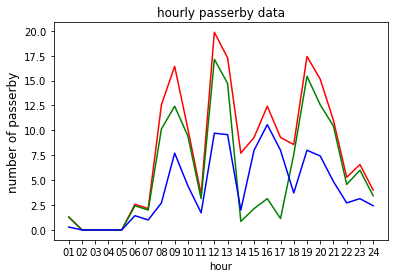

In [13]:
# 정리한 데이터를 꺾은선 그래프로 표현하기
import matplotlib.pyplot as plt
import csv

a = [[], [], [], [], [], [], []]  # 7 X 24 크기의 리스트 선언

with open('passby_data.csv', 'r') as f: # passby_data.csv 파일 열기
    reader = csv.DictReader(f)
    i = j = 0
    for row in reader:   # csv 파일에 저장된 데이터 수만큼 반복
        a[i].append(row)  # i번째 리스트에 csv 파일의 row행 추가
        j = j + 1
        if(j % 24 == 0):
            i = i + 1
            
x_title = ['MON', 'TUE', 'WED', 'THR', 'FRI', 'SAT', 'SUN']

day_title = ['MON', 'TUE', 'WED', 'THR', 'FRI', 'SAT', 'SUN']
hour_title = ['01', '02', '03', '04', '05', '06', \
             '07', '08', '09', '10', '11', '12', \
             '13', '14', '15', '16', '17', '18', \
             '19', '20', '21', '22', '23', '24']

# 시간대별 일반 행인의 주간 평균 구하기
avgh = []

for j in range(0, 24):  # 0~23시간만큼 반복
    day_sum = 0    # 시간대별 합 구하기
    # j번째 시간대 주간 총합
    for i in range(0, 7):
        day_sum = day_sum + int(a[i][j]['num'])
        
    avgh.append(day_sum / 7)   # j번째 시간대별 주간 평균 구하기
    
# 시간대별 30대 이하의 주간 유동 인구수

yhour = []

for j in range(0, 24):  # 0~23시간만큼 반복
    day_ysum = 0    # 시간대별 합 구하기
    # j번째 시간대 주간 총합
    for i in range(0, 7): # 일주일 반복
        day_ysum = day_ysum + int(a[i][j]['ynum'])
        
    yhour.append(day_ysum / 7)

# 시간대별 여성의 주간 유동 인구수

whour = []

for j in range(0, 24):  # 0~23시간만큼 반복
    day_wsum = 0    # 시간대별 합 구하기
    # j번째 시간대 주간 총합
    for i in range(0, 7): # 일주일 반복
        day_wsum = day_wsum + int(a[i][j]['wnum'])
        
    whour.append(day_wsum / 7)
    

# 그래프에 제목 붙이기
plt.title("hourly passerby data") # 그래프 제목
plt.xlabel("hour", fontsize = 10) # x축 제목
plt.ylabel("number of passerby", fontsize = 12) # y축 제목

plt.plot(hour_title, avgh, 'r', hour_title, yhour, 'g', hour_title, whour, 'b')
# 일반 - 빨강, 30이하 - 초록, 여성 - 파랑
plt.show()

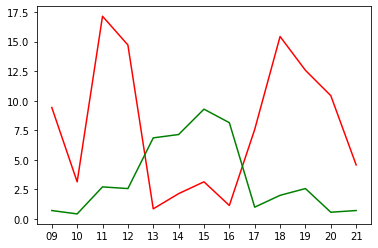

In [10]:
# 오전 9시부터 오후 9시까지 유동인구 중 40세 이상 행인의 수와, 40세 미만 행인의 수를 한꺼번에 출력하는 그래프

hour_title9 = ['09', '10', '11', '12', \
             '13', '14', '15', '16', '17', '18', \
             '19', '20', '21']
            
# 40대 미만

under40 = []

for j in range(9, 22):  # 9~21시간만큼 반복
    day_under_sum = 0    # 시간대별 합 구하기
    # j번째 시간대 주간 총합
    for i in range(0, 7): # 일주일 반복
        day_under_sum = day_under_sum + int(a[i][j]['ynum'])
        
    under40.append(day_under_sum / 7)
    
# 40대 이상

over40 = []

for j in range(9, 22):
    day_over_sum = 0
    for i in range(0, 7):
        day_over_sum = day_over_sum + (int(a[i][j]['num']) - int(a[i][j]['ynum']))
    
    over40.append(day_over_sum / 7)
    
plt.plot(hour_title9, under40, 'r') # 빨강 40 미만
plt.plot(hour_title9, over40, 'g') # 초록 40 이상
plt.show()